In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

iris= datasets.load_iris()

In [31]:
X = iris['data'][:,(2,3)]
y = (iris['target']==2).astype(np.float64)

svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('classifier', LinearSVC(C=1,loss='hinge'))
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LinearSVC(C=1, loss='hinge'))])

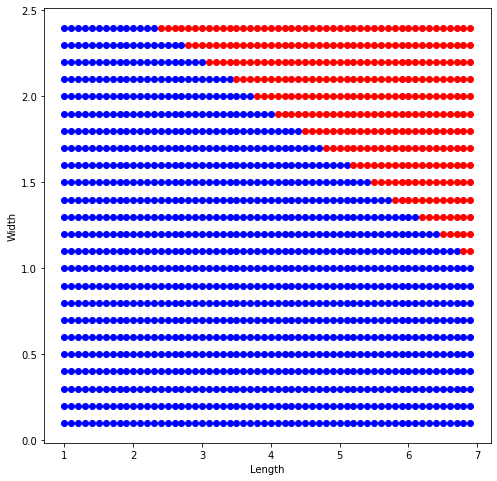

In [32]:
import matplotlib.pyplot as plt
X_test_1=np.arange(1,7,0.1)
X_test_2=np.arange(0.1,2.5,0.1)
X_test=[]
for i in X_test_1:
    for j in X_test_2:
        X_test.append([i,j])
plt.figure(figsize=(8,8))

for data in X_test:
    predict_class=svm_clf.predict([data])
    if predict_class[0]==0:
        plt.plot(data[0],data[1],'bo') #Virginia
    else:
        plt.plot(data[0],data[1],'ro') #Not Virginia
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

iris = sns.load_dataset('iris')

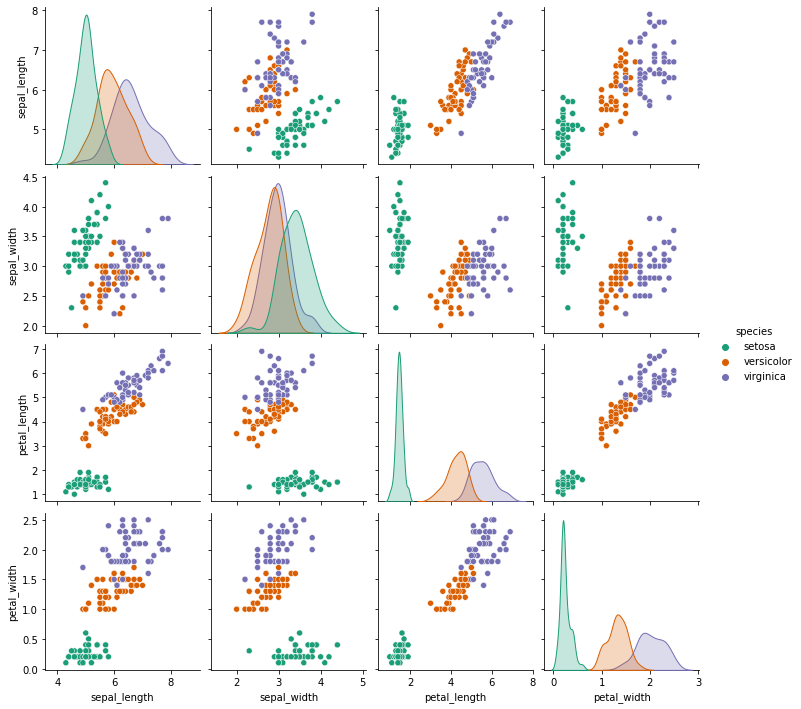

In [34]:
sns.pairplot(iris, hue='species', palette='Dark2')

In [35]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [36]:
from sklearn.svm import SVC
svc_model = SVC()

In [37]:
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)

In [38]:
print(confusion_matrix(y_test,predictions))

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [41]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[15  0  0]
 [ 0 13  2]
 [ 0  0 15]]


In [42]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.87      0.93        15
   virginica       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## 비선형 SVM 대표 사례 : Make Moon

In [54]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

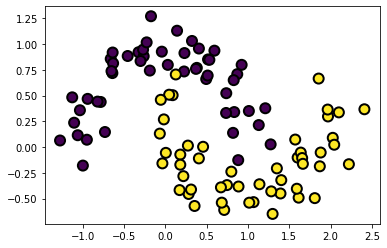

In [56]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.show()

In [57]:
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge")),
])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

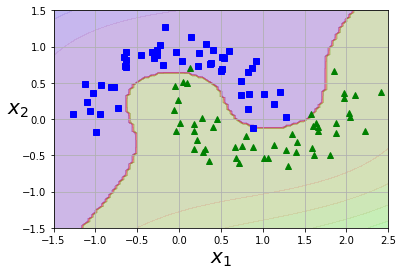

In [59]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
def plot_prediction(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
plot_prediction(polynomial_svm_clf, [-1.5, 2.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1.5, 1.5])

plt.show()

In [60]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [61]:
from sklearn.svm import SVC
poly100_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])

poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

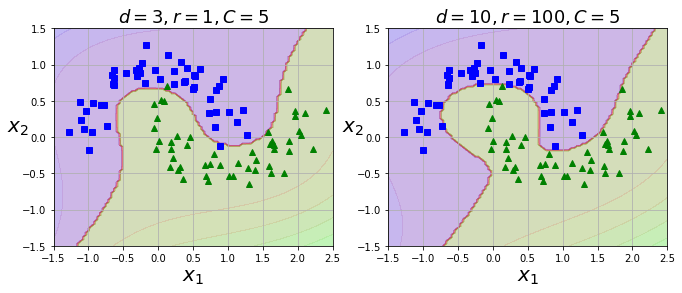

In [62]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_prediction(poly_kernel_svm_clf, [-1.5, 2.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1.5, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_prediction(poly100_kernel_svm_clf, [-1.5, 2.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1.5, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

Text(0.5, 1.0, '$d=3, r=1, C=5$')

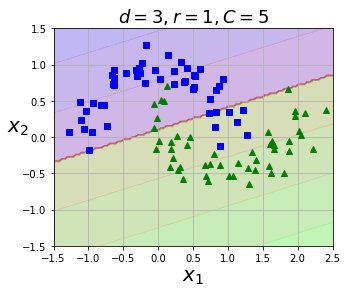

In [63]:
linear_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="linear", degree=3, coef0=1, C=5))
])

linear_svm_clf.fit(X, y)
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_prediction(linear_svm_clf, [-1.5, 2.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1.5, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)
